In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [3]:
# 生成数据
# 样本量少于特征量，50样本，200个正
X = np.random.randn(50,200)
X

array([[-0.52446774,  0.12898753, -1.07437941, ..., -0.97625874,
        -0.78624401, -0.28649478],
       [ 0.05632819,  1.02034257,  0.70230792, ...,  0.17648101,
         0.18176799,  0.80841815],
       [-1.32464507,  0.66241534,  0.41586899, ..., -0.81779747,
        -1.066118  ,  0.20034201],
       ...,
       [ 2.68637692,  0.97539353,  0.08095682, ..., -0.98524715,
        -1.69301956,  0.01146837],
       [ 1.25829491, -1.2866843 ,  0.03893529, ...,  0.1249987 ,
        -0.01203048, -0.20920948],
       [-2.26694718, -1.06805913,  0.09515678, ..., -0.08821951,
         1.41324897, -1.5250042 ]])

In [4]:
# Xw = y
w = np.random.randn(200)
# 随机选取190，让其为0
w

array([-1.6720228 ,  2.2553278 ,  0.16893176, -0.28068182,  0.3489252 ,
        0.32917723, -0.8938504 , -1.32537324, -0.92462955,  0.44319675,
        0.37456837, -0.29528373,  1.4013335 ,  0.94980474,  0.02597777,
        0.3627075 , -2.5379918 , -0.17866419,  0.47617713,  1.69809038,
        1.49360769,  0.02028165, -0.6271127 ,  0.04670735, -1.00027663,
        0.36655587,  0.33293369,  0.22520928,  0.92271583, -0.66842045,
       -0.74906431, -0.21587841,  0.46885199, -0.9722825 , -0.36977327,
       -0.31652612,  0.45418824,  0.13806836,  0.45478662, -0.96549068,
       -1.1653248 , -0.8576307 , -1.4512708 , -1.29604499, -0.43805476,
        0.78614431, -0.54333196, -0.29196745, -0.11723215, -0.92691541,
       -0.38524848, -0.5313207 ,  1.06117166, -0.35733204, -1.06977018,
       -1.03972664,  0.64203491, -0.69879101,  0.25070221,  0.92197582,
       -0.47542489,  1.03784056,  0.02433861,  0.41209794, -0.77396256,
        0.07800091,  0.40010412, -1.22913112,  0.60108841,  1.31

In [5]:
index= np.arange(200)
index
np.random.shuffle(index)
index


array([168,  34, 138,  82,  69, 140, 118,  98, 147, 166,  97, 144, 110,
        42, 170,  45,  84,  90,  78,  80,  41, 187, 181, 146,  56,  49,
        85, 133,  27, 148,  32,  66,  81, 155, 176,  86,  61,  96, 192,
       114,  13,   4,  76,  36, 158,  91,  92, 102, 111, 193, 191,   8,
       167, 149, 184, 136, 173, 128,  37, 100,  77, 159, 197,  72,  26,
        58,  18, 182, 199,  16, 196,  40,  17, 190, 131,   1,  11,   5,
       101,  28, 145, 185,  83, 156,  46,  39,   6,  79, 107,  30,  44,
       108,  21,  59, 143,  53, 104, 175, 157,  93, 183,  55,  67, 109,
        95,  22, 153,  38,  70, 105, 174,  24, 180, 121,   0,  15, 164,
        19, 122, 125, 163,  62,  29, 195,  12,   2, 112, 160, 115, 172,
       130,  73,  99,  65,  89, 116,  48,   9, 117, 150,  71, 161, 152,
       137,  57, 113, 126,  31, 162, 171,   3, 179,  74, 124, 129,  94,
       151, 189, 120,  47, 123, 127, 198,  88,  33, 177,  60,  23, 134,
        25, 165,  64,  20,  87,  10,  75, 135,  43, 103,  50, 16

In [8]:
w[index[:190]] = 0
w[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [8]:
X.shape

(50, 200)

In [9]:
# y是目标值
y = X.dot(w)
y

array([ 2.30097369, -3.53208241,  0.63887043, -2.64498359, -0.5868929 ,
       -4.52161017,  1.56060108, -1.83814873, -4.52234976, -3.10812565,
        0.28811269, -2.41419685, -1.65541783, -6.7369418 ,  1.91829529,
        3.51498877, -1.55509263, -3.68197738,  9.20855383,  5.14750535,
        6.90849548, -9.30871095, -0.14693045,  1.68557541, -0.83248459,
       -3.48756365, -1.12751943, -0.86989749,  3.61875456,  1.2665372 ,
       -3.13224461,  0.5569719 ,  5.50434273,  0.98166646, -2.90395518,
        0.39588136, -3.38934646,  1.90687265, -1.95439412,  5.73331265,
        4.27327059,  6.12559418, -0.34713187,  1.49650411, -0.77891682,
       -3.54619011,  2.16539897,  1.09077525, -3.43716876,  3.44953553])

In [11]:
display(X.shape, w.shape)

(50, 200)

(200,)

Text(0.5, 1.0, 'Lasso')

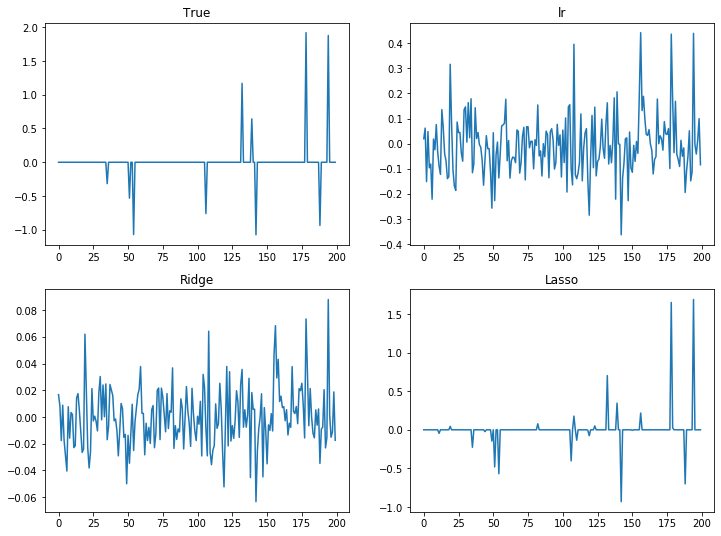

In [12]:
lr = LinearRegression(fit_intercept=False)

ridge = Ridge(alpha = 1000,fit_intercept=False)

lasso = Lasso(alpha=0.1,fit_intercept=False)


lr.fit(X,y)

ridge.fit(X,y)

lasso.fit(X,y)


lr_w = lr.coef_

ridge_w = ridge.coef_

lasso_w = lasso.coef_



# 四个子视图
plt.figure(figsize=(12,9))

ax = plt.subplot(2,2,1)
ax.plot(w)
ax.set_title('True')


ax = plt.subplot(2,2,2)
ax.plot(lr_w)
ax.set_title('lr')

ax = plt.subplot(2,2,3)
ax.plot(ridge_w)
ax.set_title('Ridge')

ax = plt.subplot(2,2,4)
ax.plot(lasso_w)
ax.set_title('Lasso')

In [15]:
lr_w

array([ 1.94913872e-02,  6.18770723e-02, -1.51309281e-01,  4.81856137e-02,
       -9.62230824e-02, -8.13306347e-02, -2.21267473e-01,  1.83018565e-02,
       -2.44901796e-02,  7.62680935e-02, -3.19576306e-02, -8.93474385e-02,
       -1.22465062e-01,  1.35686198e-01,  6.46030593e-02, -4.01927472e-02,
       -6.82026337e-02, -1.39321927e-01, -1.31219486e-01,  3.16262858e-01,
        7.88669252e-02, -1.03654386e-01, -1.68901281e-01, -1.86520255e-01,
        8.61249248e-02,  4.42214579e-02,  4.48907764e-02, -3.62742946e-02,
       -6.98645419e-02,  1.35223322e-01,  1.46680365e-01,  6.23177288e-03,
        1.63554491e-01,  2.35753234e-02,  1.78847852e-01, -1.15935816e-01,
       -8.05445201e-02,  1.43030527e-01,  2.04461373e-02,  4.44494093e-02,
       -3.39690484e-03, -1.49633595e-02, -6.69836725e-02, -1.65552900e-01,
       -6.68509600e-02,  3.17204431e-02, -1.97278157e-02, -1.97522794e-02,
       -1.11443880e-01, -2.56955672e-01,  4.35301787e-02, -2.26997961e-01,
       -4.44579145e-02,  